# بسم الله الرحمن الرحيم

## Lecture - 02

### Continue - Linear Algebra Using Python Review

In [4]:
# Don't forget the imports - every session
import os
import numpy as np

In [6]:
# Quick way to create arrays - Interesting :)
x = np.array(range(9))
print(x)

[0 1 2 3 4 5 6 7 8]


In [10]:
# Don't forget to assign the output of the operation
x = x.reshape(3,3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [16]:
#Matrix Transpose
# Columns are flipped over the diagonal
xT = x.T
print(x.T)

[[0 3 6]
 [1 4 7]
 [2 5 8]]


In [17]:
# Taking the Transpose of the Transpose will give us back the original array
print(xT.T)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [7]:
# Tensors
A = np.array((3,3,3,3,3,3,3,3,3,3))
print(A)
print(A.shape)
print(len(A.shape))
print(A.size)

[3 3 3 3 3 3 3 3 3 3]
(10,)
1
10


### Diagonal Matrices
- Matrix is diagonal if $D_{i,j} = 0  \;\forall\; i \neq j$
- $\begin{bmatrix} 1 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 3 \end{bmatrix}$
- Multiplying by diagonal matrix is computationally efficient
- For **diag(v)x**, we need to scale each $x_{i}$ by $v_{i}$, where $v_{i}$ is the diagonal element
- Some algorithms restrict their input parameter to be diagonal matrices, for efficiency
- Diagonal matrices don't need to be square

In [26]:
# Diagonal Matrices
# Generate the matrix in the same previous manner
x = np.arange(9).reshape((3,3))
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [27]:
# Diagonal Matrices - Continue
# Get the diagonal items values
np.diag(x)

array([0, 4, 8])

In [30]:
# Diagonal Matrices - Continue
# Generate the Diagonal Matrix from the previous values
print(np.diag(np.diag(x)))

#So, after this step, we generated a diagonal matrix based on another matrix using numpy

[[0 0 0]
 [0 4 0]
 [0 0 8]]


### Symmetric Matrices
- Matrix that is equal to its Transpose
- **A = $A^{T}$**
- $\begin{bmatrix} 1 & 2 & 3\\ 2 & 3 & 4 \\ 3 & 4 & 5 \end{bmatrix}$
- Such matrices exists when the entries are generated by functions that are similar from both sides
  - example: if this matrix holds distances between points(i,j) - d(i,j) = d(j,i)
  - Usually, Euclidean distances are symmetric

In [32]:
# Symmetric Matrices Example
a = np.array(([1,2,3],[2,3,4],[3,4,5]))
np.allclose(a, a.T)

True

In [35]:
# Another Symmetric Matrices Example
a = np.array(np.arange(9).reshape(3,3))
np.allclose(a, a.T)

False

### The Unit Vector
- Vector with unit norm
- $\left\lVert x\right\rVert _{2} = 1$
  - L2 norm
  - also known as Euclidean norm; not recommended name
  - also known as *magnitude*
  - Cartesian distance from origin
  - $\sqrt{\sum x_{i}^{2}}\;\forall\;_{i}\;in \;X$
- Unit vector can be obtained by normalizing any vector

### Vector Normalization
- The process of dividing a vector by its magnitude, which produces a unit vector
- $\frac{X}{\left\lVert x\right\rVert _{2}}$ = unit vector
- Dividing the vector by its magnitude gives us the unit vector
- Common preprocessing step
- Example
  - $x = \begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}$
  - $\frac{x}{\sqrt{4}} = \begin{bmatrix} 1/2 & 1/2 & 1/2 & 1/2 \end{bmatrix}$
  - This vector has magnitude of 1, so it is a unit vector
 

In [7]:
# Getting Vector Norm Example
from numpy import linalg as LA

# Types of supported norms
# ord 	norm for matrices 	norm for vectors
# None 	Frobenius norm 	2-norm
# ‘fro’ 	Frobenius norm 	–
# ‘nuc’ 	nuclear norm 	–
# inf 	max(sum(abs(x), axis=1)) 	max(abs(x))
# -inf 	min(sum(abs(x), axis=1)) 	min(abs(x))
# 0 	– 	sum(x != 0)
# 1 	max(sum(abs(x), axis=0)) 	as below
# -1 	min(sum(abs(x), axis=0)) 	as below
# 2 	2-norm (largest sing. value) 	as below
# -2 	smallest singular value 	as below
# other 	– 	sum(abs(x)**ord)**(1./ord)

a = np.ones(4, dtype=int)
print(a)
LA.norm(a)

[1 1 1 1]


2.0

In [6]:
# Matrix Normalization Example
# The intuition for normalizing the vectors is that elements within the vector that have large magnitudes may not be more important, 
# so normalizing them puts all elements roughly in the same scale.
# Note, we are using sklearn package here
# sudo pip install -U scikit-learn

from sklearn import preprocessing
 
# Two samples, with 3 dimensions.
# The 2 rows indicate 2 samples, 
# and the 3 columns indicate 3 features for each sample.
X = np.asarray([[-1,0,1],
                [0,1,2]], dtype=np.float) # Float is needed.
 
# Before-normalization.
print(X)

[[-1.  0.  1.]
 [ 0.  1.  2.]]


In [8]:
### Symmetric Matrices Example
# l2-normalize the samples (rows). 
X_normalized = preprocessing.normalize(X, norm='l2')
 
# After normalization.
print(X_normalized)

[[-0.70710678  0.          0.70710678]
 [ 0.          0.4472136   0.89442719]]


### Orthogonality
- vector $x$ and vector $y$ are orthogonal to each other if $x^{T}y = 0$
- If two vectors are orthogonal and both have a nonzero magnitude, they will be at a 90 degree angle to each other
- If two vectors are orthogonal and unit vectors, they are called orthonormal
- ![](imgs/Lecture-02/arrowperp.png)

## Eigen Decomposition
- Breaking mathematical objects into their constituent parts
- Mathematical objects can be understood better when they are broken into their constituetional parts, or by finding properties that are not related to how we chose to represent them
  - integers could be decomposed into prime factors
  - As 10 = 2 * 5, 
    - 10 is not divisible by 3
    - any integer multiple by 10, is also divisible by 5
- We can decompose matrices in ways that reveals information about their functional properties that is not immediately obvious from the representation of the matrix as an array of elements
- Matrix, can be represented as
  - Eigenvectors
  - Eigenvalues

### Eigen Vectors and Eigenvalues
- Eigenvector of a square matrix $A$ is a nonzero vector $v$ such that multiplication by $A$ alters only the scale of $v$ and the value that scales the matrix is the eigenvalue
- $A v = \lambda v$
- This is called: Eigenvalue equation
- $v$ - the eigenvector
- $\lambda$ - a scalar, the eigenvalue corresponding to $v$
- Eigenvector is used to longee or shirnk the matrix
- ![](imgs/Lecture-02/eigen.png)
- Figure shows the effect of Multiplication of the two orthonormal eigenvectors $^{1}$ and $^{2}$ by the matrix $A$ that lead to the distort of the unit circle

### Eigendecomposition
- If a matrix $A$ has $n$ lineraly independent eigenvectors
  - we can form a matrix $V$ with one eigenvector per column, and a vector $\lambda$ of all the eigenvalues
  - The eigendecomposotion of $A$ is then given by:
    - $A = V diag(\lambda)V^{-1}$
    - diag -> diagonal matrix
    - $V^{-1}$ -> inverse of V

### Inverse Matrix
- $AA^{-1} = A^{-1}A = I$
  - where $I$ is the identity matrix
  - Identity matrix is:
    - square matrix (2x2, 3x3, etc)
    - 1 on the diagonal, 0 elsewhere
    - Similar to the reciprocal for integers, given integer $a$ its reiprocal would be $1/a$ so when we multiply $a * 1/a$ we get $1$

### Eigendecomposition Properties
- Not every matrix can be decomposed into eigenvalues and eigenvectors
- (Optional)
  - A matrix is singular (the inverse does not exist) if any of the eigenvalues are zero
  - A matrix whose eigenvalues are all positive is called **positive definite**
  - A matrix whose eigenvalues are all positive or zero is **positive semidefinite**
  - A matrix whose eigenvalues are all negative is **negative definite**
  - Similarly matrix whose eigenvalues are all negative or zero is **negative semidefinite**

### Motivation for Eigendecomposition
- Eigenvalue decomposition is used in **priciple component analysis** (PCA)
- **PCA** is a statistical procedure that is used to covert a set of observations of possible correlated variables into a set of values of linearly uncorrelated variables called **principal components**
- In other words, PCA is a method of *summarizing* the data or *compressing* the data
- Data Compression / Information Theory :)

### Norms and Eigendecomposition - Project

In [4]:
import sys
import numpy as np

print('Python Version: {}'.format(sys.version))
print('NumPy Version: {}'.format(np.__version__))

Python Version: 3.6.5 (default, Apr  4 2018, 15:09:05) 
[GCC 7.3.1 20180130 (Red Hat 7.3.1-2)]
NumPy Version: 1.15.2


In [7]:
# import linear algebra package from NumPy
# Note here you can't say from np import linalg
from numpy import linalg

In [9]:
# Define an array
# Note: arange -> Generate the list
# -3 is subtracted from each generated number
A = np.arange(9) - 3
print(A)

[-3 -2 -1  0  1  2  3  4  5]


In [10]:
# Reshaping the Matrix 
B = A.reshape((3,3))
print(B)

[[-3 -2 -1]
 [ 0  1  2]
 [ 3  4  5]]


In [12]:
# Euclidean (L2) norm - default
# norm does not change with matrices shapes
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [13]:
# the Forgenius norm is the L2 norm for a matrix
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [15]:
# Max norm ( P = infinity)
# max norm for vector is its maximum value
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

5.0
12.0


In [17]:
# Vector normalization
# normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [18]:
# magnitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

1.0

### Eigen decomposition

- Eigenvalues and eigenvectors are easy to find with Python and NumPy.
- Remember, an eigenvector of a square matrix $\textbf{A}$ is a nonzero vector $\textbf{v}$ such that multiplication by $\textbf{A}$ alters only the scale of $\textbf{v}$
- $$\textbf{Av} = \lambda\textbf{v} $$ The scalar $\lambda$ is knows as the eigenvalue corresponding to this eigenvector.

In [14]:
# find the eigenvalues and eigenvectors for a simple square matrix
# the following line generates a diagonal matrix
A = np.diag(np.arange(1,4))
print(A)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [15]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [16]:
# returns the eigenvalues for the matrix
print(eigenvalues)

[1. 2. 3.]


In [17]:
# returns the eigenvectors for the matrix
# each column is an eigenvector
print(eigenvectors)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [18]:
# the eigenvalue w[i] corresponds to the eigenvector v[:,i]
print('Eigenvalue: {}'.format(eigenvalues[1]))
print('Eigenvector: {}'.format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


- We can easily double check that these are the correct eigenvalues and eigenvectors, by plugging them back into the eigendecomposition equation.
- The eigendecomposition of $\textbf{A}$ is given by $$\textbf{A} = \textbf{V}diag(\lambda)\textbf{V}^{-1}$$ where $\lambda$ is equal to a vector of the eigenvalues, and $\textbf{V}$ is a matrix with one eigenvector per column.

In [19]:
# returns an array on the eigenvalues on the diagonal
np.diag(eigenvalues)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [20]:
# returns the inverse of the eigenvectors matrix
np.linalg.inv(eigenvectors)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:

# verify eigendecomposition
# matmul -> matrix multiplication
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print(output)

# is it the same original matrix?

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [22]:
# import necessary matplotlib libraries
import matplotlib.pyplot as plt

# because we have 3 x 3 matrix, we will use 3D
from mpl_toolkits.mplot3d import Axes3D

# next command to display plots in jupyter notebook
%matplotlib inline


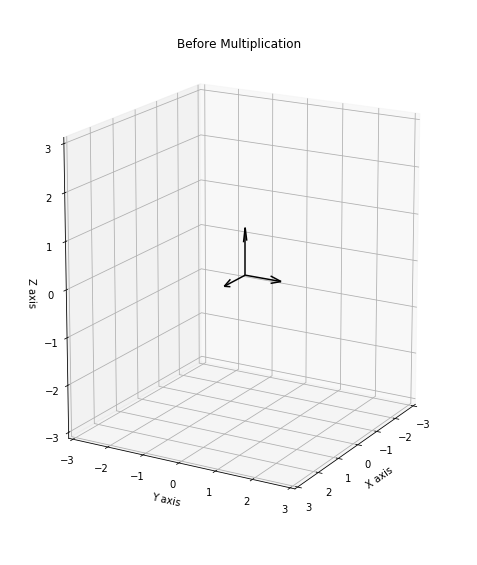

In [23]:
# plot the eigenvectors

# Define origin (x,y,z)
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(121, projection = '3d')

# we are using quiver plot
# because we have 3 Dimensional Matrix, we add origin 3 times

# color -> k = black
# eigenvectors[0,:] -> x
# eigenvectors[1,:] -> y
# eigenvectors[2,:] -> z
ax1.quiver(origin, origin, origin, eigenvectors[0, :], eigenvectors[1, :], eigenvectors[2,:], color='k')

# set limit
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])

# add labels
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# set angle
ax1.view_init(15,30)

# set title
ax1.set_title('Before Multiplication')

# show the plot
plt.show()

In [24]:
# Next, we will multiply original matrix by eigenvectors to see its effect

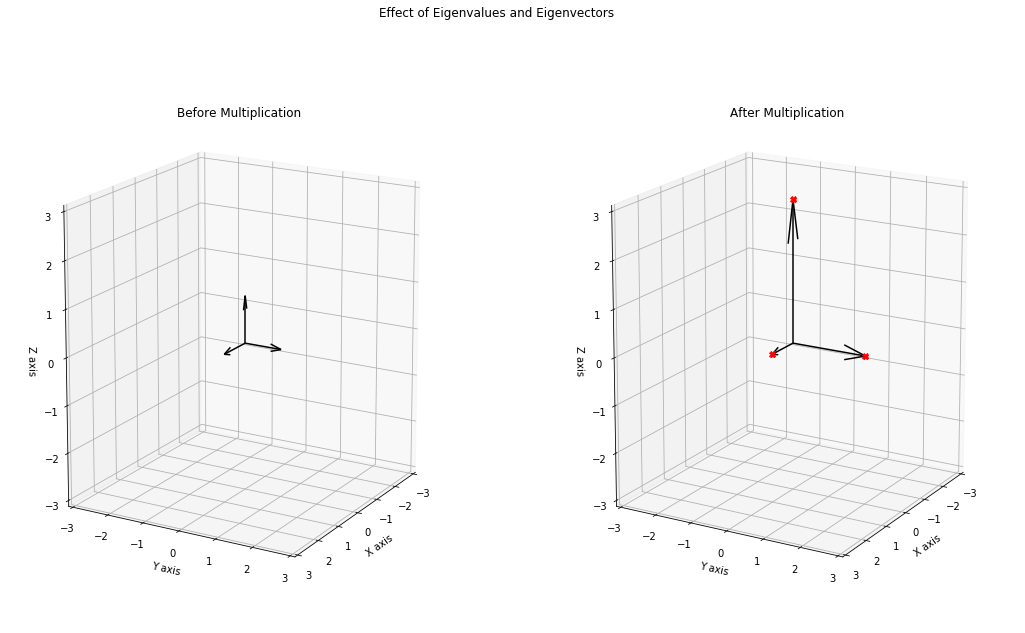

In [25]:
# plot the eigenvectors

# Define origin (x,y,z)
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
fig.suptitle('Effect of Eigenvalues and Eigenvectors')
ax1 = fig.add_subplot(121, projection = '3d')

# we are using quiver plot
# because we have 3 Dimensional Matrix, we add origin 3 times

# color -> k = black
# eigenvectors[0,:] -> x
# eigenvectors[1,:] -> y
# eigenvectors[2,:] -> z
ax1.quiver(origin, origin, origin, eigenvectors[0, :], eigenvectors[1, :], eigenvectors[2,:], color='k')

# set limit
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])

# add labels
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# set angle
ax1.view_init(15,30)

# set title
ax1.set_title('Before Multiplication')

new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection = '3d')
ax2.quiver(origin, origin, origin, new_eig[0, :], new_eig[1, :], new_eig[2,:], color='k')

# add the eigenvalues to the plot
ax2.plot((eigenvalues[0]*eigenvectors[0]),(eigenvalues[1]*eigenvectors[1]),(eigenvalues[2]*eigenvectors[2]),'rX')

# set limit
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])

# add labels
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

# set angle
ax2.view_init(15,30)

# set title
ax2.set_title('After Multiplication')

# show the plot
plt.show()